train acc, test acc | 0.07928333333333333, 0.0834
train acc, test acc | 0.7827166666666666, 0.7886
train acc, test acc | 0.8782833333333333, 0.882
train acc, test acc | 0.89705, 0.9016
train acc, test acc | 0.9075333333333333, 0.9102
train acc, test acc | 0.91425, 0.9169
train acc, test acc | 0.9192833333333333, 0.9214
train acc, test acc | 0.92265, 0.9254
train acc, test acc | 0.9271166666666667, 0.9274
train acc, test acc | 0.9298666666666666, 0.9332
train acc, test acc | 0.9326833333333333, 0.9342
train acc, test acc | 0.9357833333333333, 0.9359
train acc, test acc | 0.9381166666666667, 0.9394
train acc, test acc | 0.94055, 0.9398
train acc, test acc | 0.9429333333333333, 0.943
train acc, test acc | 0.945, 0.944
train acc, test acc | 0.94715, 0.9451


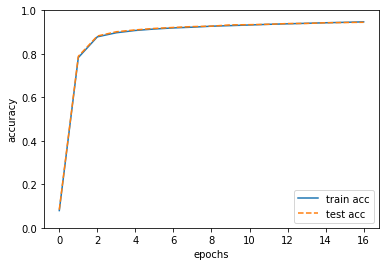

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

#全教師データ数60000/バッチサイズ100 = 600?
iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):
    #ミニバッチを確率的にランダムで取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算(推論、損失関数の計算が行われる)
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 確率的勾配降下法によるパラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #1エポックごとに制度を求める
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()